<a href="https://colab.research.google.com/github/niltontac/EspAnalise-EngDados/blob/master/PRSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Especialização em Análise e Engenharia de Dados - Cesar School/CInUFPE

Disciplina: Estatística Descritiva dos Dados

Professor: Tsang Ing Ren

Monitor: José Ivson Soares da Silva

Alunos | Analistas:
01. Cristiano Santana
02. Matheus Queiroz
03. Nilton Coura

Fonte dos dados: arquivo PRSA.csv disponível em https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from math import log

In [0]:
#Importando arquivo do conjunto de dados
weather_raw=pd.read_csv("https://raw.githubusercontent.com/niltontac/EspAnalise-EngDados/master/prsa.csv",encoding = "ISO-8859-1", sep=";", decimal=",", thousands=".")

In [3]:
#Display mostra .head() a qualquer momento no código. Aqui vemos a "cara" do conjunto de dados importado
display(weather_raw.head())  

weather_raw.dtypes

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-23.0,10208.0,-197.0,0.0,E,5.0,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-25.0,10213.0,-19.0,0.0,ENE,7.0,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,10213.0,-199.0,0.0,ENE,2.0,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-36.0,10218.0,-191.0,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-35.0,10223.0,-194.0,0.0,N,21.0,Changping


No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [4]:
#Setando as colunas "wd" e "station" como categoricos
weather_raw.wd = weather_raw.wd.astype('category')
weather_raw.station = weather_raw.station.astype('category')

weather_raw.dtypes

No            int64
year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
TEMP        float64
PRES        float64
DEWP        float64
RAIN        float64
wd         category
WSPM        float64
station    category
dtype: object

In [0]:
#IDENTIFICANDO AS VARIÁVEIS

#No           int64  #DISCRETO #ORDINAL
#year         int64  #DISCRETO #ORDINAL
#month        int64  #DISCRETO #ORDINAL
#day          int64  #DISCRETO #ORDINAL
#hour         int64  #DISCRETO #ORDINAL
#PM2.5      float64  #CONTINUO 
#PM10       float64  #CONTINUO 
#SO2        float64  #CONTINUO 
#NO2        float64  #CONTINUO 
#CO         float64  #CONTINUO 
#O3         float64  #CONTINUO 
#TEMP       float64  #CONTINUO 
#PRES       float64  #CONTINUO 
#DEWP       float64  #CONTINUO 
#RAIN       float64  #CONTINUO 
#wd         category #CONTINUO 
#WSPM       float64  #CONTINUO 
#station    category #NOMINAL

EXCLUINDO COLUNAS DESNECESSÁRIAS

In [6]:
weather_loc=weather_raw.loc[:,['year','month','SO2','NO2','CO','station']]

weather_loc.head(100)

,year,month,SO2,NO2,CO,station
0,2013,3,13.0,7.0,300.0,Changping
1,2013,3,6.0,6.0,300.0,Changping
2,2013,3,22.0,13.0,400.0,Changping
3,2013,3,12.0,8.0,300.0,Changping
4,2013,3,14.0,8.0,300.0,Changping
...,...,...,...,...,...,...
95,2013,3,21.0,43.0,1200.0,Changping
96,2013,3,20.0,37.0,900.0,Changping
97,2013,3,38.0,66.0,1600.0,Changping
98,2013,3,32.0,54.0,1399.0,Changping


DEFININDO POPULAÇÃO

In [7]:
weather_months=weather_loc[(weather_loc['month']<=3)] #Escolhendo população do primeiro trimestre

weather_years=weather_months[(weather_loc['year']>=2015) ] #Escolhendo população de 2015, 2016 e 2017

#População formada
weather_pop = weather_years
weather_pop.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(17280, 6)

LIMPANDO E TRATANDO OS DADOS

year         0
month        0
SO2        224
NO2        256
CO         226
station      0
dtype: int64

year         0
month        0
SO2        224
NO2        256
CO         226
station      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year       0
month      0
SO2        0
NO2        0
CO         0
station    0
dtype: int64

count    16861.000000
mean      1388.879663
std       1310.598845
min        100.000000
25%        500.000000
50%        900.000000
75%       1900.000000
max      10000.000000
Name: CO, dtype: float64

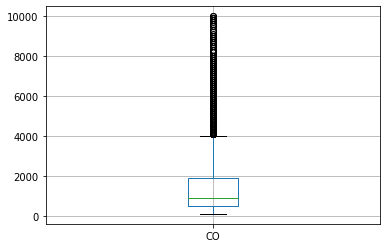

In [8]:
#Encontrando valores N/A
display(weather_pop.isna().sum())

#Encontrando valores NULL
display(weather_pop.isnull().sum())

weather_pop.dropna(axis=0, how = 'any', inplace=True)

display(weather_pop.isna().sum())

weather_pop.shape

#Data FRAME COM N/A TRATADO
display(weather_pop.boxplot('CO'))

display(weather_pop['CO'].describe())

count    16861.000000
mean        19.148568
std         21.600155
min          1.000000
25%          4.000000
50%         12.000000
75%         27.000000
max        589.000000
Name: SO2, dtype: float64

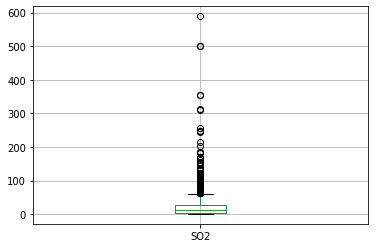

In [9]:
display(weather_pop['SO2'].describe())

display(weather_pop.boxplot('SO2'))

count    16861.000000
mean        47.352470
std         36.415086
min          2.000000
25%         18.000000
50%         40.000000
75%         70.000000
max        897.000000
Name: NO2, dtype: float64

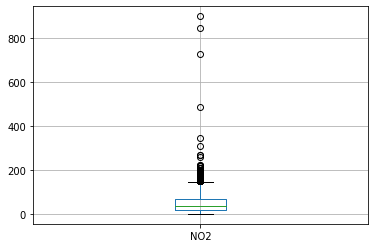

In [10]:
display(weather_pop['NO2'].describe())

display(weather_pop.boxplot('NO2'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


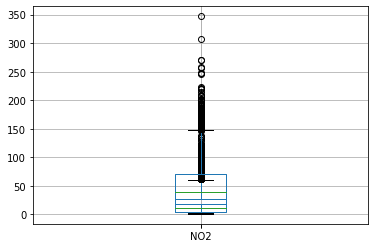

In [11]:
#TRANTANDO OUTLIERS

#custo_coletiva_d969=custo_coletiva_d969.drop(['CustoRecente_log'], axis=1)

weather_outlier_solved1=weather_pop[weather_pop['SO2']<=300]

weather_outlier_solved2=weather_outlier_solved1[weather_pop['NO2']<=400]

#Mostrando que os outliers de SO2 foram removidos
display(weather_outlier_solved2.boxplot('SO2'))

#Mostrando que os outliers de NO2 foram removidos
display(weather_outlier_solved2.boxplot('NO2'))

In [12]:
#Selecionando valores maximos

#Aproveitando que describe() fornece o valor máximo para cada coluna, segue:
max_SO2=weather_outlier_solved2['SO2'].describe()[7]

max_CO=weather_outlier_solved2['CO'].describe()[7]

max_NO2=weather_outlier_solved2['NO2'].describe()[7]

#Normalizando
weather_outlier_solved2['SO2']=weather_outlier_solved2['SO2']/max_SO2

weather_outlier_solved2['CO']=weather_outlier_solved2['CO']/max_CO

weather_outlier_solved2['NO2']=weather_outlier_solved2['NO2']/max_NO2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [13]:
#APRESENTANDO DFs

#População
weather_population=weather_outlier_solved2

#ESTATISTICA POPULAÇÃO
display('POPULAÇÃO', weather_population.describe())


#ESTATISTICA PRIMEIRO GRUPO
weather_sample_1=weather_population.sample(frac=0.1)
display(weather_sample_1)

display('AMOSTRA 1',weather_sample_1.describe())


#ESTATISTICA SEGUNDO GRUPO
weather_sample_2= weather_population.sample(frac=0.1)
display(weather_sample_2)

display('AMOSTRA 2',weather_sample_2.describe())

'POPULAÇÃO'

,year,month,SO2,NO2,CO
count,16851.000000,16851.000000,16851.000000,16851.000000,16851.000000
mean,2015.871818,1.862797,0.073860,0.135986,0.138835
std,0.777469,0.790627,0.077474,0.100153,0.131004
min,2015.000000,1.000000,0.003891,0.005764,0.010000
25%,2015.000000,1.000000,0.015564,0.051873,0.050000
50%,2016.000000,2.000000,0.046693,0.115274,0.090000
75%,2016.000000,3.000000,0.105058,0.201729,0.190000
max,2017.000000,3.000000,1.000000,1.000000,1.000000


,year,month,SO2,NO2,CO,station
97014,2016,3,0.007782,0.020173,0.02,Huairou
51980,2015,2,0.058366,0.097983,0.06,Gucheng
34084,2017,1,0.035019,0.092219,0.08,Changping
51920,2015,2,0.097276,0.164265,0.18,Gucheng
25455,2016,1,0.042802,0.103746,0.02,Changping
...,...,...,...,...,...,...
52661,2015,3,0.038911,0.023055,0.06,Gucheng
69270,2017,1,0.062257,0.167147,0.16,Gucheng
86697,2015,1,0.042802,0.132565,0.16,Huairou
34189,2017,1,0.077821,0.161383,0.11,Changping


'AMOSTRA 1'

,year,month,SO2,NO2,CO
count,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000
mean,2015.872997,1.889614,0.072274,0.132967,0.134997
std,0.780105,0.794678,0.078197,0.098100,0.130441
min,2015.000000,1.000000,0.003891,0.005764,0.010000
25%,2015.000000,1.000000,0.015564,0.051873,0.040000
50%,2016.000000,2.000000,0.046693,0.112392,0.090000
75%,2016.000000,3.000000,0.101167,0.195965,0.180000
max,2017.000000,3.000000,0.961089,0.599424,0.990000


,year,month,SO2,NO2,CO,station
17021,2015,2,0.015564,0.046110,0.05,Changping
95152,2016,1,0.023346,0.048991,0.01,Huairou
86237,2015,1,0.023346,0.014409,0.03,Huairou
34267,2017,1,0.015564,0.054755,0.04,Changping
69715,2017,2,0.108949,0.149856,0.12,Gucheng
...,...,...,...,...,...,...
51694,2015,1,0.295720,0.325648,0.36,Gucheng
96948,2016,3,0.038911,0.017291,0.02,Huairou
51323,2015,1,0.132296,0.184438,0.14,Gucheng
51379,2015,1,0.112840,0.224784,0.14,Gucheng


'AMOSTRA 2'

,year,month,SO2,NO2,CO
count,1685.000000,1685.000000,1685.000000,1685.000000,1685.000000
mean,2015.816024,1.847478,0.077463,0.135233,0.140623
std,0.777110,0.790307,0.081701,0.099078,0.134588
min,2015.000000,1.000000,0.003891,0.005764,0.010000
25%,2015.000000,1.000000,0.019455,0.048991,0.040000
50%,2016.000000,2.000000,0.046693,0.115274,0.090000
75%,2016.000000,2.000000,0.108949,0.201729,0.190000
max,2017.000000,3.000000,0.715953,0.645533,0.990000


GRÁFICOS

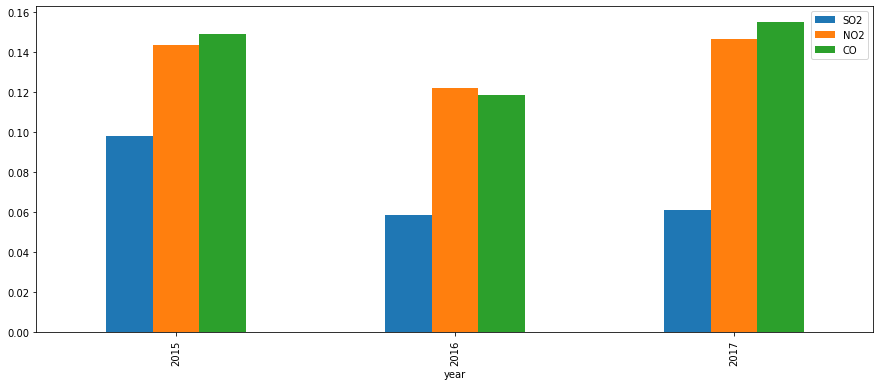

In [14]:
#TRABALHANDO COM O GRUPO 1, UMA VEZ QUE FOI PROVADO SER BEM SUCEDIDO 

weather_outlier_solved2.groupby('year')['SO2','NO2','CO'].mean().plot.bar(figsize=(15,6))

#weather_sample_1.plot(x='year',y='CO').hist()

#Abaixo os gráficos mostram a Média, Mediana, Desvio Padrão, Variância e Coeficiente de Variância  


#Média

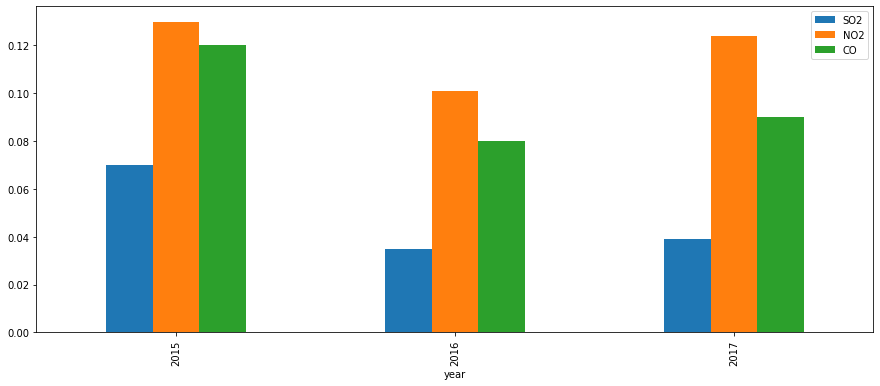

In [15]:
#Mediana 

weather_outlier_solved2.groupby('year')['SO2','NO2','CO'].median().plot.bar(figsize=(15,6))

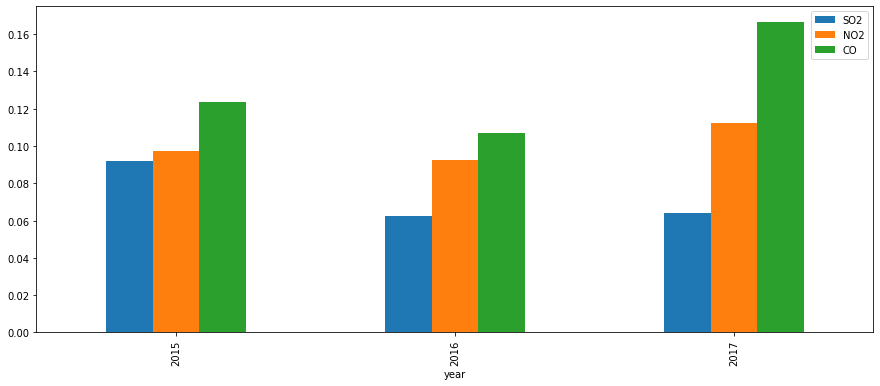

In [16]:
#Desvio Padrão

weather_outlier_solved2.groupby('year')['SO2','NO2','CO'].std().plot.bar(figsize=(15,6))

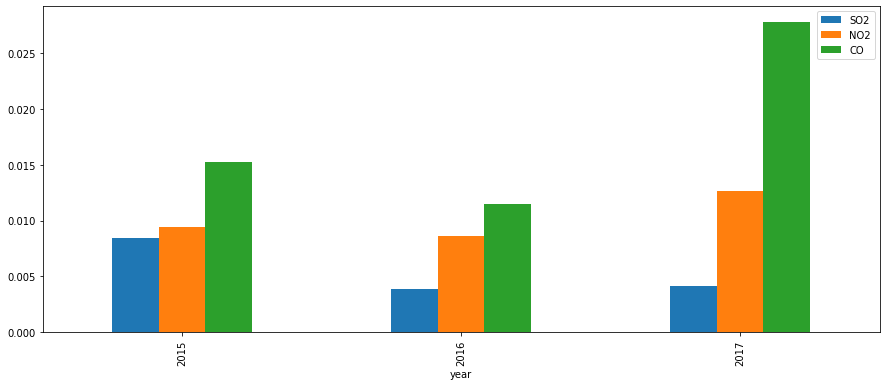

In [17]:
#Variancia

weather_outlier_solved2.groupby('year')['SO2','NO2','CO'].var().plot.bar(figsize=(15,6))

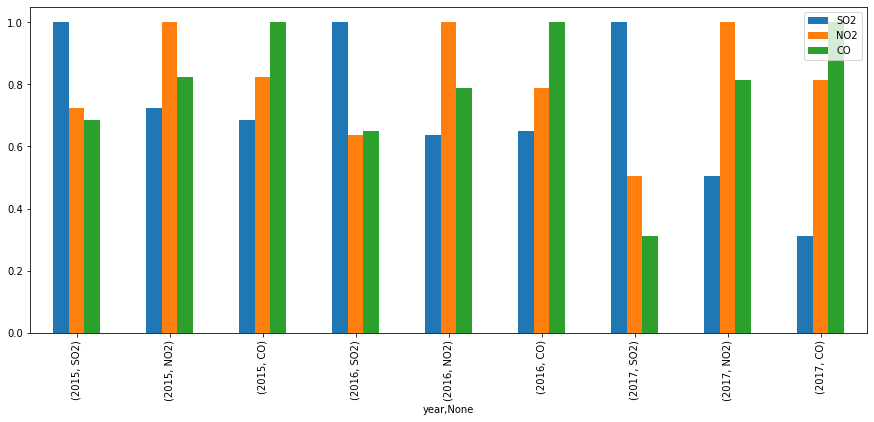

In [18]:
#Coeficiente de variância (método de Pearson)

weather_outlier_solved2.groupby('year')['SO2','NO2','CO'].corr(method='pearson').plot.bar(figsize=(15,6))